In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


In [17]:

data  = pd.read_csv('/content/Esophageal_Dataset.csv')

data.head()

,Unnamed: 0,patient_barcode,tissue_source_site,patient_id,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,...,primary_pathology_lymph_node_examined_count,primary_pathology_number_of_lymphnodes_positive_by_he,primary_pathology_number_of_lymphnodes_positive_by_ihc,primary_pathology_planned_surgery_status,primary_pathology_treatment_prior_to_surgery,primary_pathology_residual_tumor,primary_pathology_karnofsky_performance_score,primary_pathology_eastern_cancer_oncology_group,primary_pathology_radiation_therapy,primary_pathology_postoperative_rx_tx
0,0,TCGA-2H-A9GF,2H,A9GF,0500F1A6-A528-43F3-B035-12D3B7C99C0F,YES,C15.5,8140/3,C15.5,NO,...,8.0,7.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
1,1,TCGA-2H-A9GG,2H,A9GG,70084008-697D-442D-8F74-C12F8F598570,YES,C15.5,8140/3,C15.5,NO,...,19.0,4.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
2,2,TCGA-2H-A9GH,2H,A9GH,606DC5B8-7625-42A6-A936-504EF25623A4,YES,C15.5,8140/3,C15.5,NO,...,30.0,1.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
3,3,TCGA-2H-A9GI,2H,A9GI,CEAF98F8-517E-457A-BF29-ACFE22893D49,YES,C15.5,8140/3,C15.5,NO,...,8.0,4.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
4,4,TCGA-2H-A9GJ,2H,A9GJ,EE47CD59-C8D8-4B1E-96DB-91C679E4106F,YES,C15.5,8140/3,C15.5,NO,...,19.0,0.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO


In [18]:
data.shape

(3985, 85)

In [19]:
data.columns

Index(['Unnamed: 0', 'patient_barcode', 'tissue_source_site', 'patient_id',
       'bcr_patient_uuid', 'informed_consent_verified', 'icd_o_3_site',
       'icd_o_3_histology', 'icd_10',
       'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'days_to_birth',
       'country_of_birth', 'gender', 'height', 'weight',
       'country_of_procurement', 'state_province_of_procurement',
       'city_of_procurement', 'race_list', 'ethnicity', 'other_dx',
       'history_of_neoadjuvant_treatment', 'person_neoplasm_cancer_status',
       'vital_status', 'days_to_last_followup', 'days_to_death',
       'tobacco_smoking_history', 'age_began_smoking_in_years',
       'stopped_smoking_year', 'number_pack_years_smoked',
       'alcohol_history_documented', 'frequency_of_alcohol_consumption',
       'amount_of_alcohol_consumption_per_day', 'reflux_history',
       'antireflux_treatment_types', 'h_pylori_infection',
       'initial_diagnosis_by', 'barretts_e

In [20]:
def drop_columns():

  cols = dict(data.isnull().sum())



  for col in data.columns:

    if cols[col] > 1000:

      data.drop(col, axis=1, inplace=True)



drop_columns()

In [21]:
dict(data.isnull().sum())

null_cols = [col for col in data.columns if data[col].isnull().sum() > 0]



for col in null_cols:

  print(data[col].value_counts())

  print(data[col].isnull().sum())

tissue_prospective_collection_indicator
NO     2368
YES    1577
Name: count, dtype: int64
40
tissue_retrospective_collection_indicator
YES    2368
NO     1577
Name: count, dtype: int64
40
height
173.0    186
175.0    179
174.0    173
178.0    166
170.0    164
169.0    162
176.0    156
172.0    152
171.0    150
180.0    149
168.0    148
177.0    148
179.0    140
166.0    126
167.0    124
165.0    109
183.0     95
164.0     93
163.0     90
182.0     82
181.0     82
162.0     77
161.0     73
184.0     67
160.0     56
188.0     48
185.0     47
159.0     45
157.0     45
186.0     44
158.0     41
155.0     39
187.0     39
154.0     32
156.0     32
152.0     23
190.0     22
189.0     21
150.0     17
192.0     16
153.0     14
149.0     11
147.0     11
193.0     10
194.0      8
151.0      8
191.0      7
148.0      6
195.0      6
146.0      5
145.0      5
197.0      5
196.0      4
202.0      3
199.0      2
200.0      2
201.0      1
Name: count, dtype: int64
219
weight
64.0     132
61.0     118
6

In [22]:
race_by_country = data.groupby('country_of_procurement')['race_list'].agg(lambda x: x.mode())

data['race_list'] = data['race_list'].fillna(data['country_of_procurement'].map(race_by_country))

In [23]:
weight_by_country = data.groupby('country_of_procurement')['weight'].agg(lambda x: x.mean())

data['weight'] = data['weight'].fillna(data['country_of_procurement'].map(weight_by_country))


In [24]:
height_by_country = data.groupby('country_of_procurement')['height'].agg(lambda x: x.mean())

data['height'] = data['height'].fillna(data['country_of_procurement'].map(height_by_country))

In [25]:
data.drop(columns=['bcr_patient_uuid','country_of_procurement','Unnamed: 0', 'patient_barcode','patient_id', 'informed_consent_verified', 'city_of_procurement','history_of_neoadjuvant_treatment','project', 'primary_pathology_tumor_tissue_site' ], inplace=True)

In [26]:
data.primary_pathology_age_at_initial_pathologic_diagnosis = data.primary_pathology_age_at_initial_pathologic_diagnosis.astype(int)

In [27]:
data.race_list = data.race_list.astype(str)

<ipython-input-28-d7a77e06a9d8>:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, data = data)


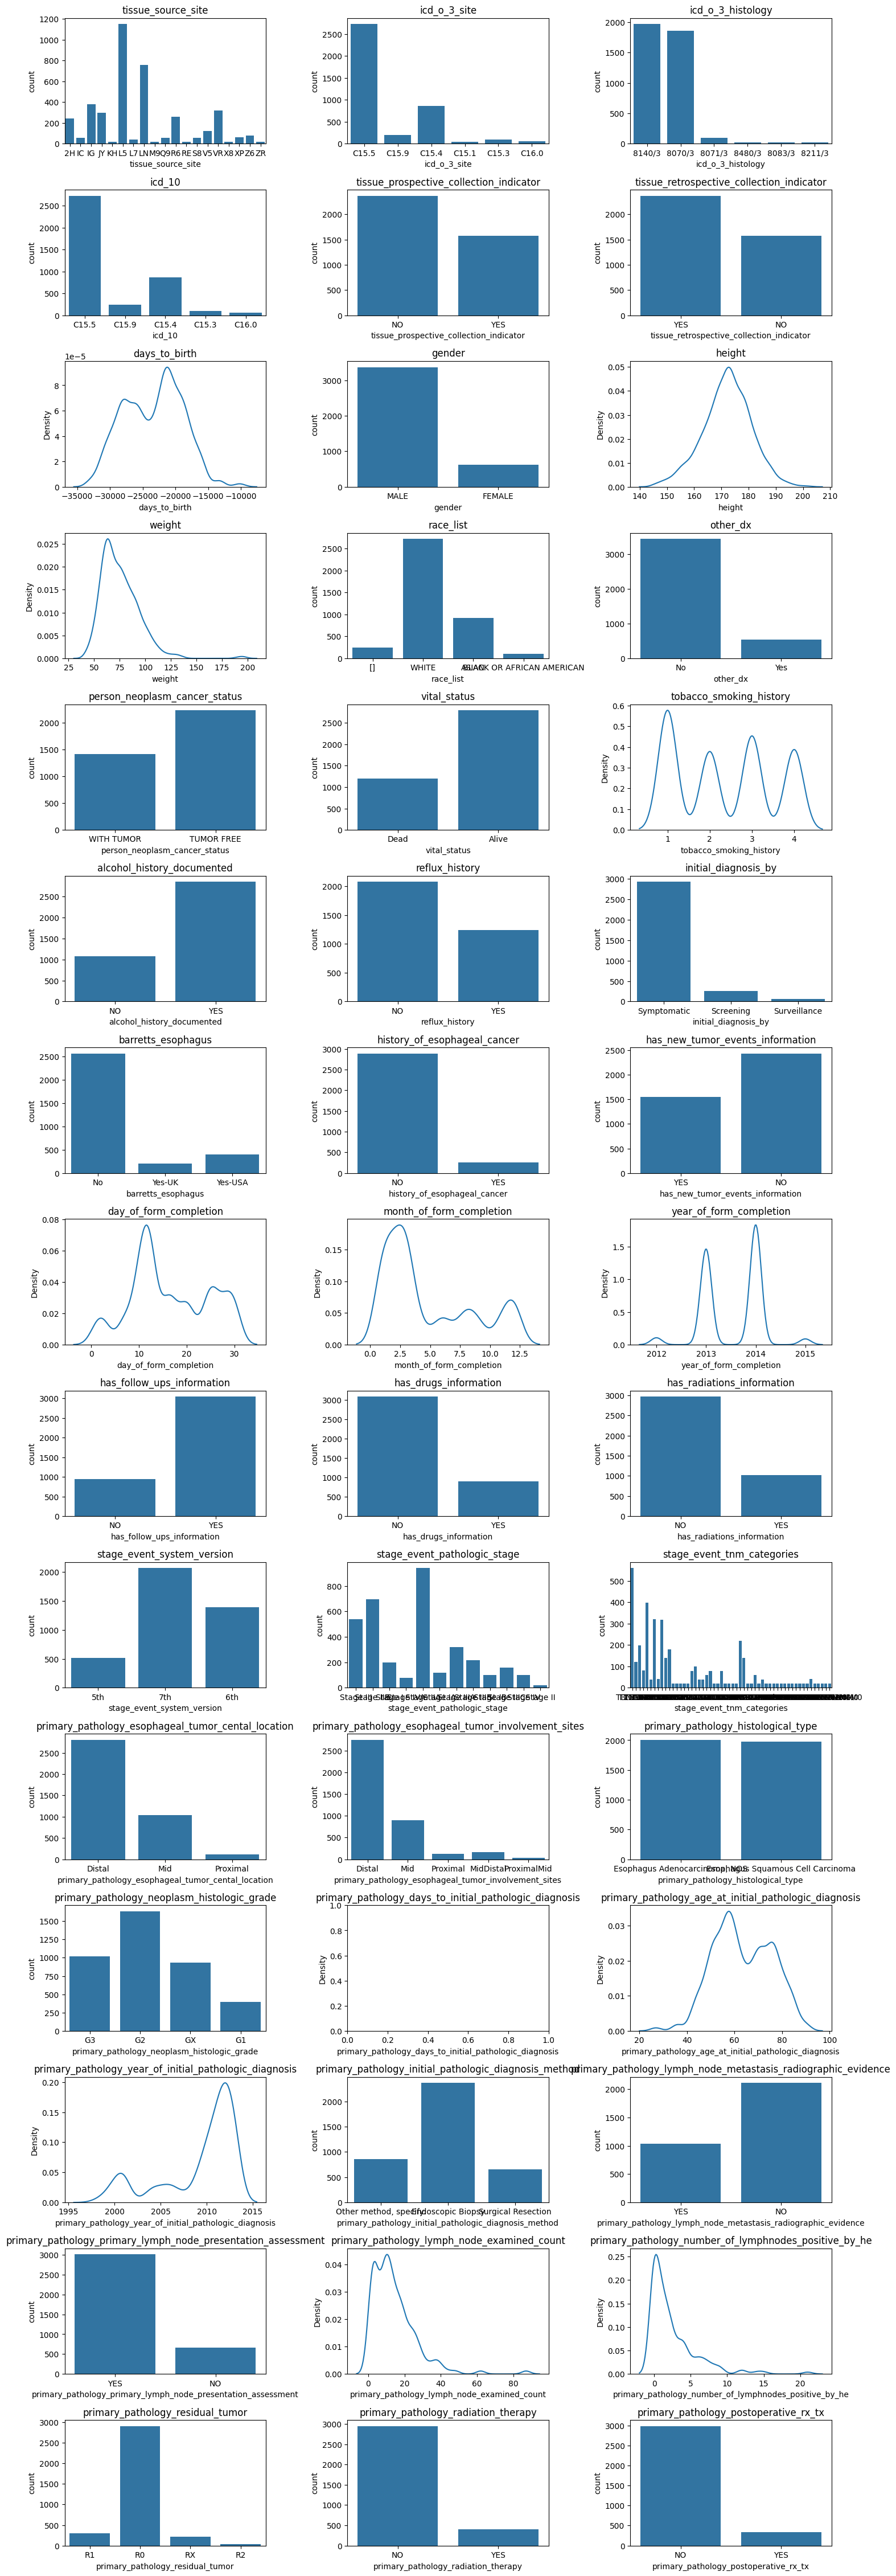

In [28]:
def plot():

  categorical_cols = [col for col in data.select_dtypes(include=['object']).columns]

  # Increase the number of rows to accommodate all columns

  num_rows = int(np.ceil(len(data.columns) / 2.0))  # Calculate rows needed

  plt.figure(figsize=(15, 3 * num_rows))  # Adjust figure height based on rows

  for i, col in enumerate(data.columns):

    plt.subplot(num_rows, 3, i + 1)  # Use calculated rows and loop index

    plt.title(col)

    if col in categorical_cols:

      sns.countplot(x=col, data=data)

    else:

      sns.kdeplot(x=col, data = data)



  plt.tight_layout()  # Adjust subplot spacing to avoid overlap

  plt.show()



plot()

<ipython-input-29-d36a3b24c819>:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, hue='gender', data = data)


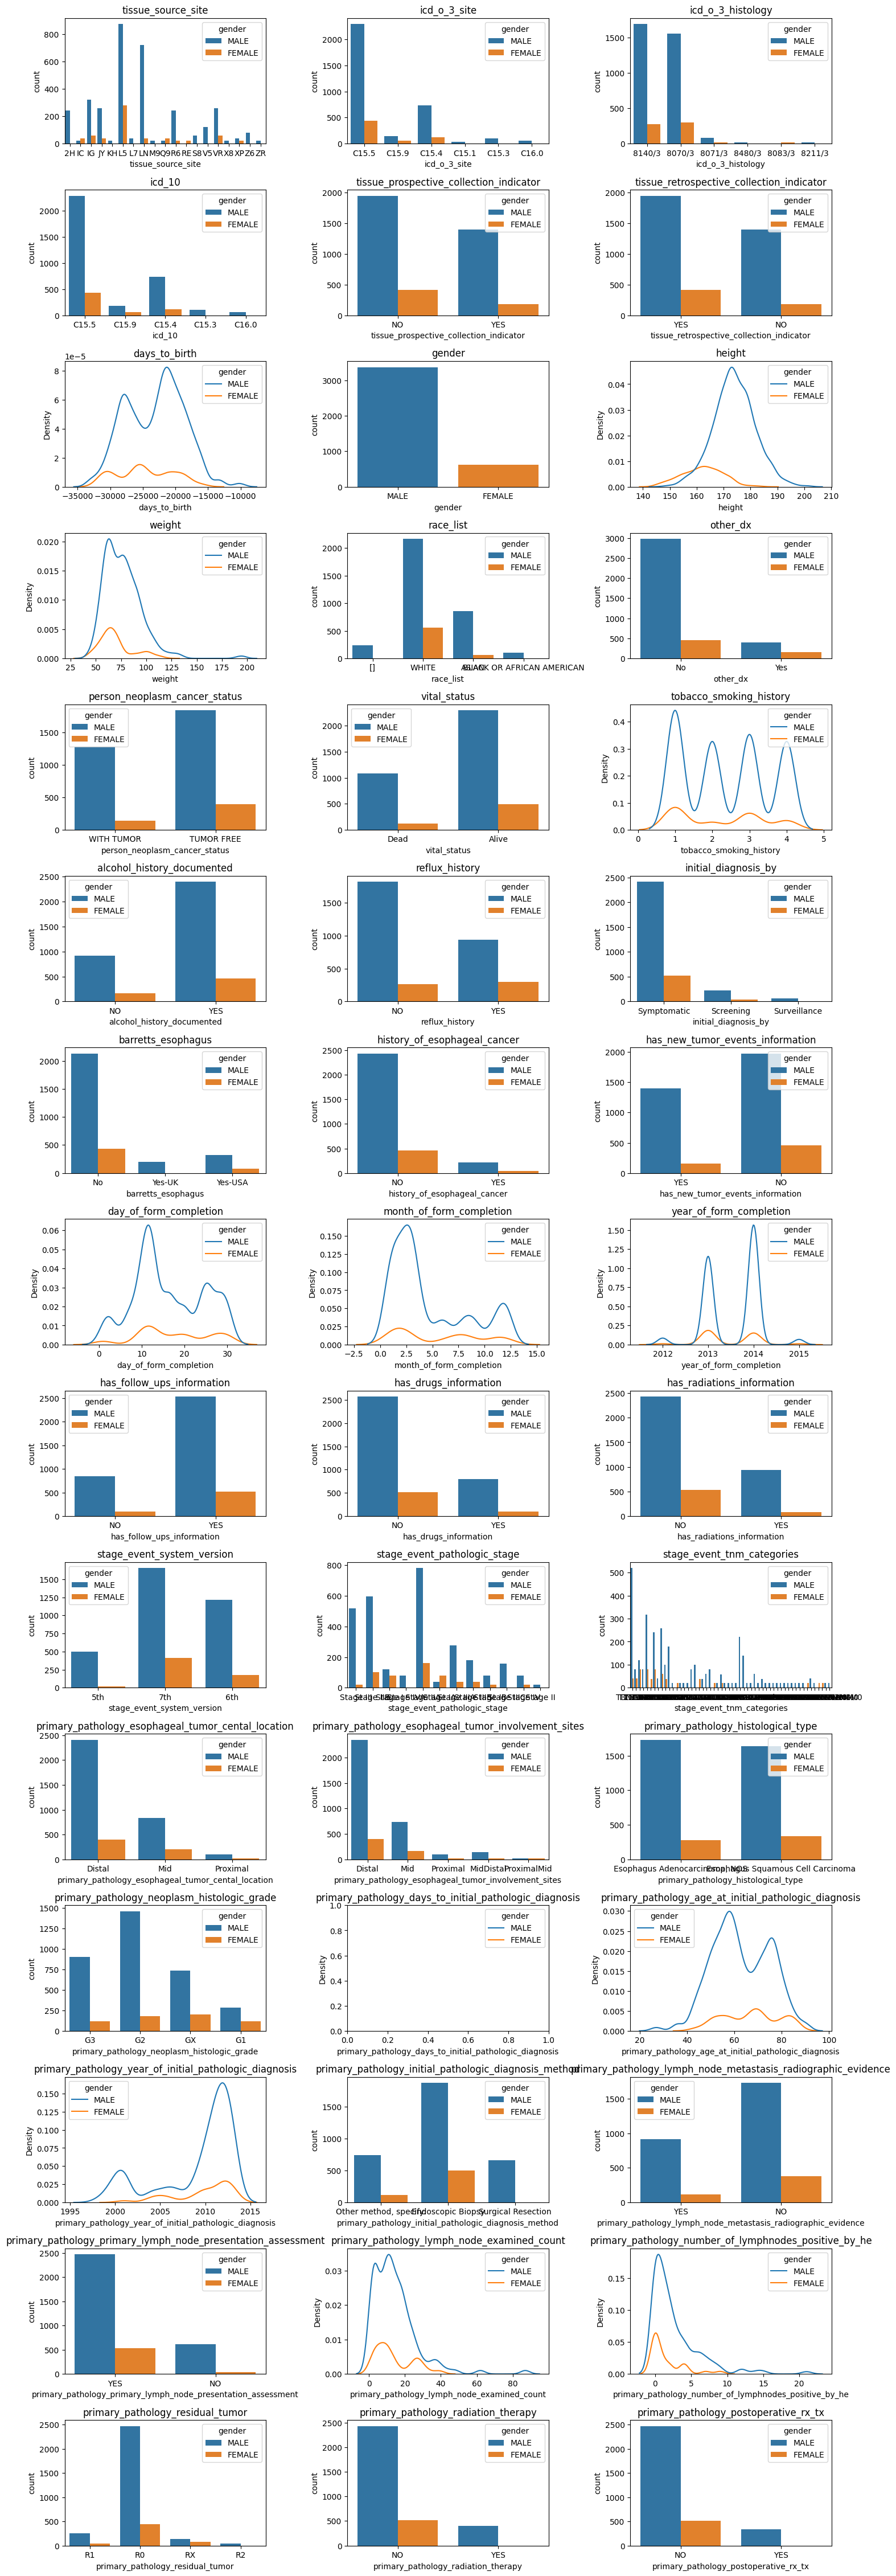

In [29]:
def plot():

  categorical_cols = [col for col in data.select_dtypes(include=['object']).columns]

  # Increase the number of rows to accommodate all columns

  num_rows = int(np.ceil(len(data.columns) / 2.0))  # Calculate rows needed

  plt.figure(figsize=(15, 3 * num_rows))  # Adjust figure height based on rows

  for i, col in enumerate(data.columns):

    plt.subplot(num_rows, 3, i + 1)  # Use calculated rows and loop index

    plt.title(col)

    if col in categorical_cols:

      sns.countplot(x=col, data=data, hue='gender')

    else:

      sns.kdeplot(x=col, hue='gender', data = data)



  plt.tight_layout()  # Adjust subplot spacing to avoid overlap

  plt.show()



plot()

In [30]:
from sklearn.impute import KNNImputer

from sklearn.preprocessing import LabelEncoder



# Create a LabelEncoder object

encoder = LabelEncoder()

_data = data

# Iterate over each column in the DataFrame

for col in data.select_dtypes(include=['object']).columns:

    # Fit the encoder to the unique values in the column

    encoder.fit(data[col])

    # Transform the column using the encoder

    _data[col] = encoder.transform(_data[col])





imputer = KNNImputer(n_neighbors=5)

data_filled = imputer.fit_transform(_data)

__data = pd.DataFrame(data_filled, columns=data.columns)



# Iterate over each column in the DataFrame to revert to original values

for col in __data.select_dtypes(include=['number']).columns:

# if the col was an object column then revert to original values

    if col in data.select_dtypes(include=['object']).columns:

        __data[col] = encoder.inverse_transform(__data[col].astype(int))

In [31]:
data = __data

In [32]:
data['Age'] = abs(data.days_to_birth/365)

data.drop(columns=['days_to_birth','primary_pathology_year_of_initial_pathologic_diagnosis','primary_pathology_days_to_initial_pathologic_diagnosis'], inplace=True)

In [33]:
X = data.drop(columns=['person_neoplasm_cancer_status'])

y = data['person_neoplasm_cancer_status']

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.998745294855709


In [39]:
import joblib
from google.colab import files

# Example: Saving the trained model
joblib.dump(cancer, 'cancer.ipynb')

# Now, download the saved model
files.download('cancer.ipynb')

NameError: name 'cancer' is not defined